In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd

# Q1
An important part of our project is to link actors with their career path. We defined the career path as a chronological list the personas of all characters he played.
We can split this task in two steps:
- link characters to their personas
- link actor to their personas using the fact that the metadata contains character names.

## link characters to their personas
To do this, we extracted characters and their personas from the movies summaries. We did this using the ``gpt4o mini`` model, prompting it to extract characters and their personas of each summary. We currently only computed this for the first 9000 summaries of the ``plot_summaries.txt``, but the rest can be computed in 4 days (not doable faster than 10000 documents a day due to API limitations).

In [4]:
pd.read_pickle('src/data/processed_data0-9000.pkl')

,name,persona,wikipedia_id
0,Shlykov,[the warrior],23890098
1,Lyosha,"[the rebel, the lover]",23890098
0,Katniss Everdeen,"[the warrior, the caregiver, the rebel]",31186339
1,Peeta Mellark,"[the lover, the caregiver, the seducer]",31186339
2,Primrose Everdeen,"[the child, the orphan]",31186339
...,...,...,...
4,The Chief of Police,"[the ruler, the mentor]",6183117
0,Noah Arkwright,"[the rebel, the creator, the lover]",10572926
1,Kirstin,"[the caregiver, the mentor]",10572926
2,Ray,"[the joker, the caregiver]",10572926


then we can link the personas with the cator who played them using the character name and the wikipedia movie id.

In [6]:
career_paths = pd.read_pickle('src/data/careers_paths.pkl')
career_paths

,personas_list,actor_age_during_movies,wikipedia_movies_id,freebase_actor_id
actor_name,,,,
A Martinez,"[[the mentor, the warrior]]",[62.0],[30231661],/m/025rrt9
A. J. Cook,"[[the lover], [the orphan, the caregiver, the ...","[22.0, 23.0]","[1376896, 12256764]",/m/02zyvw
Aamir Khan,"[[the rebel], [the rebel, the caregiver]]","[20.0, 25.0]","[8153108, 3322205]",/m/015npr
Aaron Aziz,"[[the ruler, the magician]]",[32.0],[16345566],/m/0j9mvdl
Aaron Eckhart,"[[the detective, the caregiver], [the caregive...","[32.0, 37.0, 43.0]","[1354757, 19189562, 12580152]",/m/03t4cz
...,...,...,...,...
Zoë Kravitz,"[[the caregiver, the lover], [the caregiver, t...","[21.0, 21.0, nan]","[29545870, 29545870, 27686452]",/m/03c144k
Zsa Zsa Gábor,"[[the caregiver, the creator], [the seducer, t...","[75.0, nan]","[4832313, 10099627]",/m/013ybx
Zuzana Fialová,[[the lover]],[32.0],[18555435],/m/0cr7m2r


In [18]:
#career path example
path_example = career_paths[career_paths.index=='Harrison Ford']

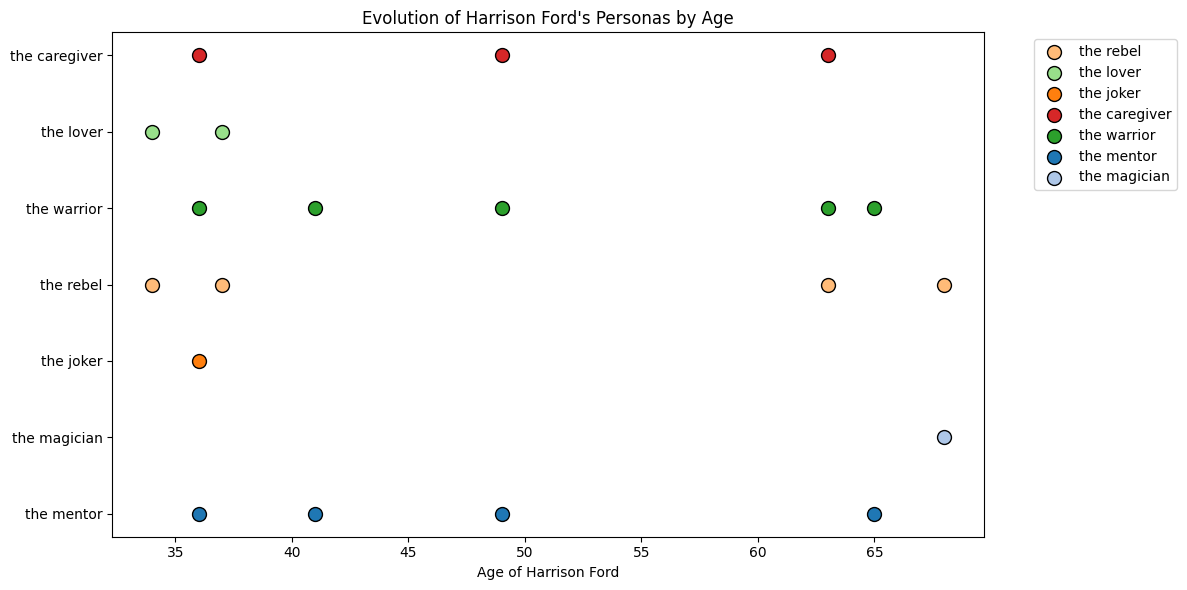

In [19]:
# visualise the path as personas played given the actor age
import matplotlib.pyplot as plt

# Data
personas = path_example['personas_list'].item()
ages = path_example['actor_age_during_movies'].item()

# Flatten data into persona-age pairs for easier plotting
persona_age_pairs = [(age, persona) for age, persona_list in zip(ages, personas) for persona in persona_list]

# Unique personas for color mapping
unique_personas = list(set(persona for _, persona in persona_age_pairs))

# Color mapping for personas
color_map = {persona: plt.cm.tab20(i) for i, persona in enumerate(unique_personas)}

# Plotting
plt.figure(figsize=(12, 6))
for age, persona in persona_age_pairs:
    plt.scatter(age, unique_personas.index(persona), color=color_map[persona], label=persona, s=100, edgecolor="black")

# Axis setup
plt.yticks(range(len(unique_personas)), unique_personas)
plt.xlabel("Age of Harrison Ford")
plt.title("Evolution of Harrison Ford's Personas by Age")

# Legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Remove duplicate labels in legend
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()